# Proyecto

## Descripción del proyecto.


Participantes:


*   Elemento de la lista
*   Elemento de la lista
*   Elemento de la lista



In [460]:
import pandas as pd

# Importamos nuestro dataset
data = pd.read_csv("predictive_maintenance.csv")
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [461]:
data['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [462]:
data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

## Limpieza de datos

Verificamos que no haya valores nulos en nuestro dataset.

In [463]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Eliminamos columnas que no ocuparemos

In [464]:
data = data.drop(columns=["UDI", "Product ID"])

# Mostramos como quedaria nuestro dataset
data.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure

In [465]:
# Convertir la columna de tipo a valores numéricos


# Minutos de desgaste
data['Type'] = data['Type'].map({'L': 2, 'M': 3, 'H': 5})


# Aplicar Label Encoding
data['Failure Type'] = data['Failure Type'].map({
    "No Failure": 1,
    "Heat Dissipation Failure": 2,
    "Power Failure": 3,
    "Overstrain Failure": 4,
    "Tool Wear Failure": 5,
    "Random Failures": 6
})

In [466]:
data.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     3                298.1                    308.6                    1551   
1     2                298.2                    308.7                    1408   
2     2                298.1                    308.5                    1498   
3     2                298.2                    308.6                    1433   
4     2                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0         42.8                0       0             1  
1         46.3                3       0             1  
2         49.4                5       0             1  
3         39.5                7       0             1  
4         40.0                9       0             1

Ahora verificamos mediante boxplots para ver si hay valores atipicos, dato por dato.

El cual los colores **salmon** seran boxplots **sin valores** atipicos.

---

Y el color **rojo** seran boxplot **con valores** atipicos.

## Boxplot

### Temperatura del aire

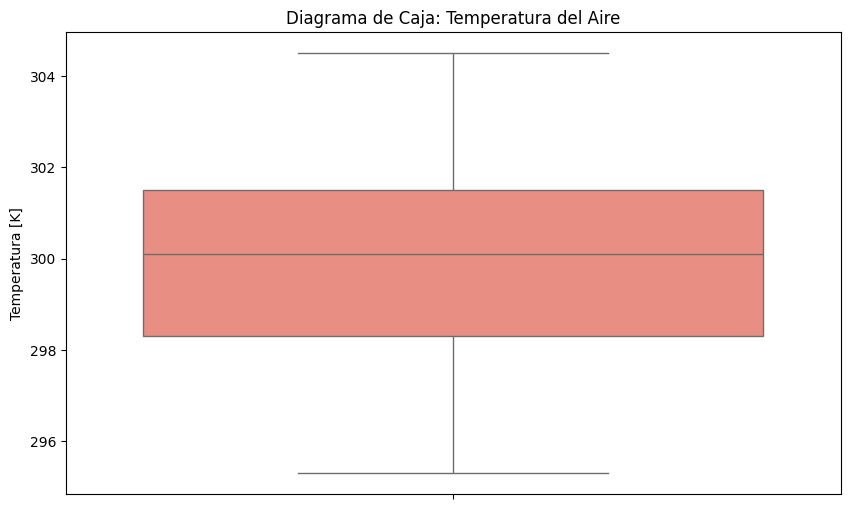

In [467]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para visualizar valores atípicos en la temperatura del aire
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Air temperature [K]'], color='salmon')
plt.title('Diagrama de Caja: Temperatura del Aire')
plt.ylabel('Temperatura [K]')
plt.show()

*Sin valores atipicos*

### Temperatura del proceso

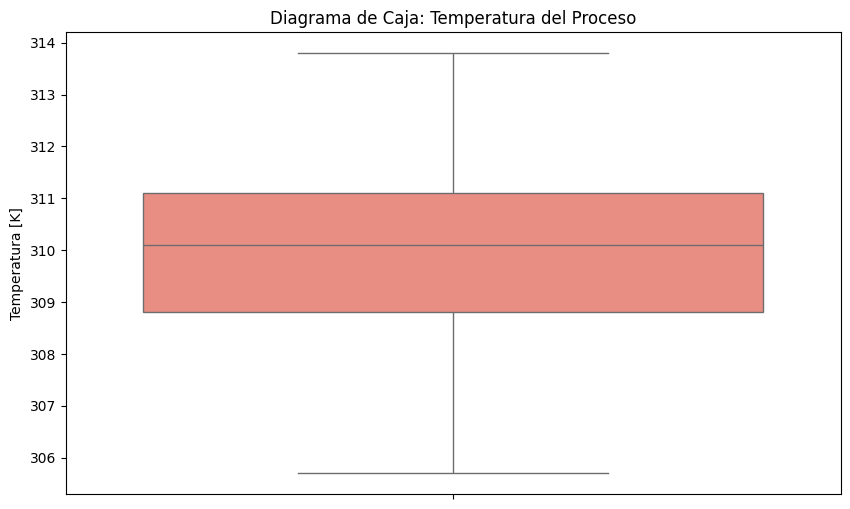

In [468]:
# Crear un boxplot para visualizar valores atípicos en la temperatura del proceso
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Process temperature [K]'], color='salmon')
plt.title('Diagrama de Caja: Temperatura del Proceso')
plt.ylabel('Temperatura [K]')
plt.show()

*Sin valores atipicos*

### Velocidad rotacional

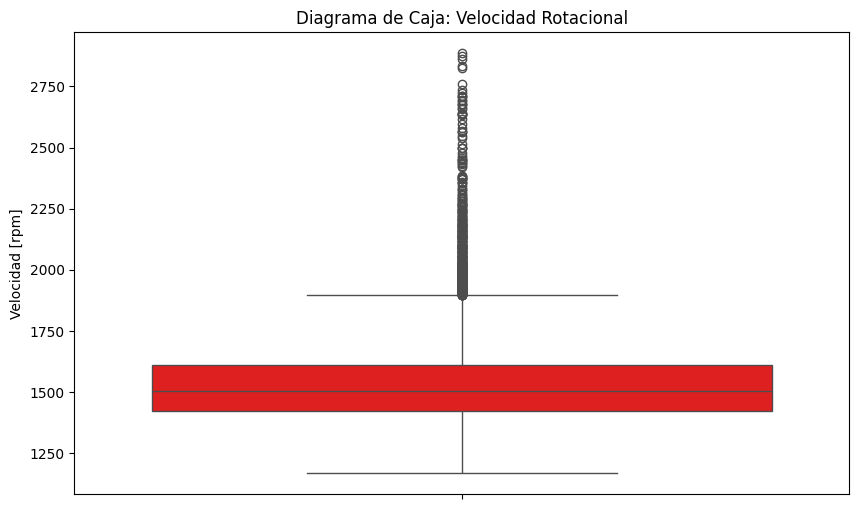

In [469]:
# Crear un boxplot para visualizar valores atípicos en la velocidad rotacional
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Rotational speed [rpm]'], color="red")
plt.title('Diagrama de Caja: Velocidad Rotacional')
plt.ylabel('Velocidad [rpm]')
plt.show()

*Con valores atipicos*

#### Tratamiento de valores atipicos

In [470]:
# Calcular cuartiles e IQR
Q1, Q3 = data['Rotational speed [rpm]'].quantile([0.25, 0.75])
IQR = Q3 - Q1

# Definir límites de valores atípicos
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (data['Rotational speed [rpm]'] < lim_inf) | (data['Rotational speed [rpm]'] > lim_sup)
num_outliers = outliers.sum()

# Reemplazar valores atípicos
data['Rotational speed [rpm]'] = data['Rotational speed [rpm]'].clip(lim_inf, lim_sup)
num_reemplazados = num_outliers  # Ya que cada outlier se reemplaza

# Mostrar resultados
print(f"Cantidad de valores atípicos detectados: {num_outliers}")
print(f"Cantidad de valores reemplazados: {num_reemplazados}")

Cantidad de valores atípicos detectados: 418
Cantidad de valores reemplazados: 418


### Torque

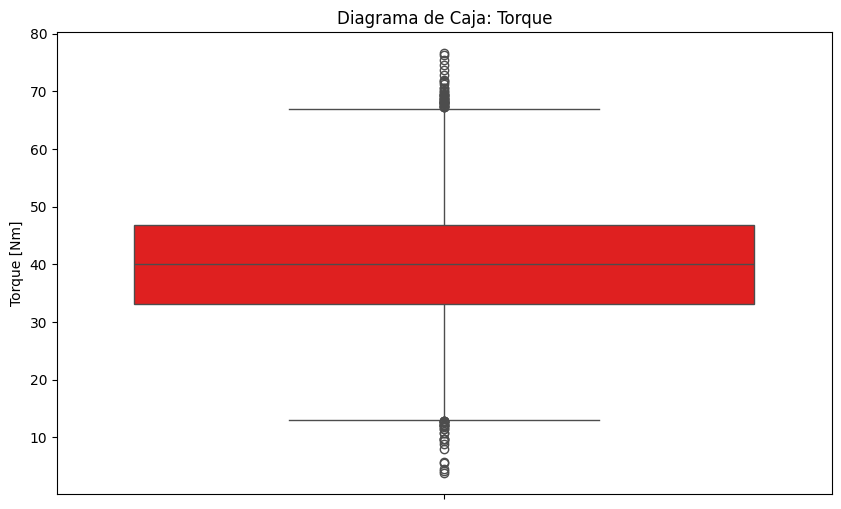

In [471]:
# Crear un boxplot para visualizar valores atípicos en el torque
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Torque [Nm]'], color='red')
plt.title('Diagrama de Caja: Torque')
plt.ylabel('Torque [Nm]')
plt.show()

*Con valores atipicos*

In [472]:
# Calcular cuartiles e IQR
Q1, Q3 = data['Torque [Nm]'].quantile([0.25, 0.75])
IQR = Q3 - Q1

# Definir límites de valores atípicos
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (data['Torque [Nm]'] < lim_inf) | (data['Torque [Nm]'] > lim_sup)
num_outliers = outliers.sum()

# Reemplazar valores atípicos
data['Torque [Nm]'] = data['Torque [Nm]'].clip(lim_inf, lim_sup)
num_reemplazados = num_outliers  # Cada outlier es reemplazado

# Mostrar resultados
print(f"Cantidad de valores atípicos detectados: {num_outliers}")
print(f"Cantidad de valores reemplazados: {num_reemplazados}")

Cantidad de valores atípicos detectados: 69
Cantidad de valores reemplazados: 69


### Tool Wear (Corregir)

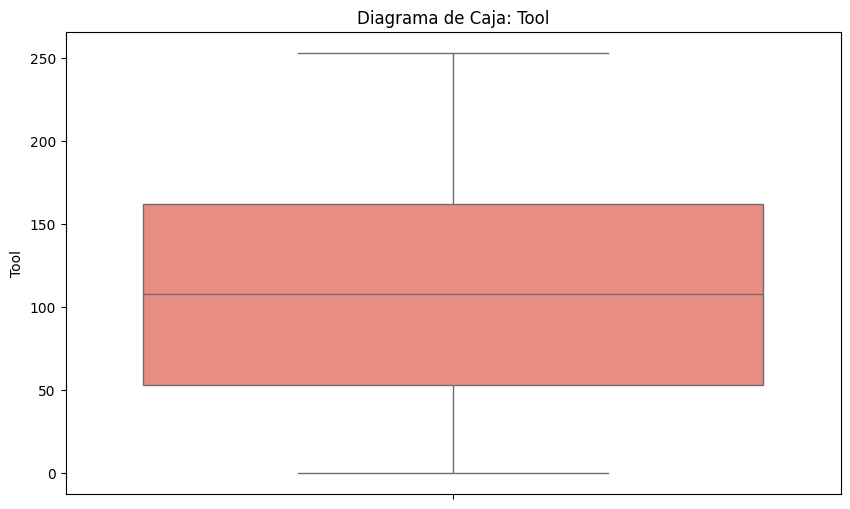

In [473]:
# Crear un boxplot para visualizar valores atípicos  tool weear (Corregir)
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Tool wear [min]'], color='salmon')
plt.title('Diagrama de Caja: Tool')
plt.ylabel('Tool')
plt.show()

*Sin valores atipicos*

## Modelo de Regresión

In [474]:
# Variables independientes (características)
x_regresion = data[['Torque [Nm]', 'Tool wear [min]']]

# Variable dependiente (objetivo)
y_regresion = data['Rotational speed [rpm]']

###Escalado de Datos


Escalamos los datos para que nuestros modelos puedan leerlo de una manera mas sencilla.

En nuestro caso utilizaremos conforme nos de mejor precision nuestro modelos entre MinMaxScaler y StandarScaler

In [475]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del escalador
scaler_min_max = MinMaxScaler()
scaler_standar = StandardScaler()

# Ajustar y transformar los datos
x_escalado_min_max = scaler_min_max.fit_transform(x_regresion)  # X es el conjunto de datos y esta escalado con MinMaxScaler()
x_escalado_standar = scaler_standar.fit_transform(x_regresion)  # X es el conjunto de datos y esta escalado con StandardScaler()

### Dividimos el conjunto de datos

Insertamos nuestros datos escalados y luego dividimos dichos datos conforme vayamos probando la precision.

In [476]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(x_escalado_standar, y_regresion, test_size=0.3, random_state=42)


### Importamos y creamos nuestro modelo

En esta parte importaremos la librerias para instanciar nuestro modelo y lo entrenaremos conforme los parametros correspondientesen nuestro caso ocuparemos haremos uso de RandomForest y XGBoost.
Para saber cual se adapta mas a nuestros datos

In [477]:
# Importamos la librerias de RandomFores y XGBoost
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Crear el modelo

#model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=1, random_state=42)

### Entrenamiento del modelo

Entrenamos nuestro modelo con los datos divididos en nuetros caso un 70% de entrenamiento tanto de X y Y

In [478]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Hacemos nuestra predicción de y conforme los datos de prueba de x

In [479]:
# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)
y_pred

array([1546.183 , 1446.6879, 1477.9851, ..., 1436.6963, 1553.0002,
       1604.5685], dtype=float32)

En esta grafica veremos que tanto se separa nuestros valores de nuestro modelo. Viendo que tan preciso fue.

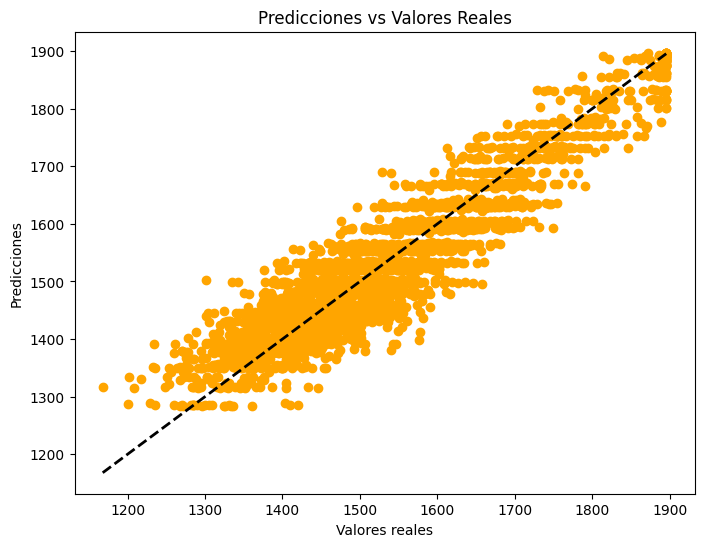

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

Ahora utilizaremos metricas como MAE, MSE, RMSE y R2 para saber que tanto se equivoca nuestro modelo, si es que tenemos errores grandes y la "precision" de nuestro modelo.

In [481]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir el reporte
print("Reporte de Evaluación del Modelo de Regresión:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Reporte de Evaluación del Modelo de Regresión:
Mean Absolute Error (MAE): 39.1513
Mean Squared Error (MSE): 2500.3269
Root Mean Squared Error (RMSE): 50.0033
R^2 Score: 0.8865


### Temporal

Para saber si nuestro dataset es sobreajustado o ajustado

In [482]:
results = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
results.to_csv("predicciones.csv", index=False)

In [483]:
y_train_pred = model.predict(X_train)
results_train = pd.DataFrame({"y_train": y_train, "y_train_pred": y_train_pred})
results_train.to_csv("predicciones_train.csv", index=False)

## Modelo Clasificación

In [484]:
data.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

## Smote

In [485]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

x_clasificacion = data.drop(columns=['Failure Type', 'Target'])
y_clasificacion = data['Target']  # Variable objetivo

# Aplicar SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_clasificacion, y_clasificacion)

# Convertir de nuevo a DataFrame
data_resampled = pd.DataFrame(x_resampled, columns=x_clasificacion.columns)
data_resampled['Target'] = y_resampled

# Verificar el balance después de aplicar SMOTE
print(data_resampled['Target'].value_counts())


x_clasificacion_smote = data_resampled.drop(columns=['Target'])
y_clasificacion_smote = data_resampled['Target']

Target
0    9661
1    9661
Name: count, dtype: int64


In [486]:
x_clasificacion

Type  Air temperature [K]  Process temperature [K]  \
0        3                298.1                    308.6   
1        2                298.2                    308.7   
2        2                298.1                    308.5   
3        2                298.2                    308.6   
4        2                298.2                    308.7   
...    ...                  ...                      ...   
9995     3                298.8                    308.4   
9996     5                298.9                    308.4   
9997     3                299.0                    308.6   
9998     5                299.0                    308.7   
9999     3                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                     1551.0         42.8                0  
1                     1408.0         46.3                3  
2                     1498.0         49.4                5  
3                     1433.0         39.5                7  
4                     1408.0         40.0                9  
...                      ...          ...              ...  
9995                  1604.0         29.5               14  
9996                  1632.0         31.8               17  
9997                  1645.0         33.4               22  
9998                  1408.0         48.5               25  
9999                  1500.0         40.2               30  

[10000 rows x 6 columns]

In [487]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_clasificacion, X_test_clasificacion, y_train_clasificacion, y_test_clasificacion = train_test_split(x_clasificacion_smote, y_clasificacion_smote, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train_clasificacion, y_train_clasificacion)

# Predecir con el modelo
y_pred_clasificacion = modelo_rf.predict(X_test_clasificacion)

# Evaluar el modelo
accuracy = accuracy_score(y_test_clasificacion, y_pred_clasificacion)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test_clasificacion, y_pred_clasificacion))

Accuracy: 0.9790
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1934
           1       0.97      0.99      0.98      1931

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865



## Modelo Clustering

In [488]:
# Seleccionar características numéricas relevantes
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
X = data[features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [498]:
from sklearn.decomposition import PCA
# Reducir la dimensionalidad con PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Mostrar las cargas (componentes principales)
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2', 'PC3'])
print("Cargas de las Componentes Principales:")
print(pca_components)

# Mostrar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("\nVarianza Explicada por Componente:")
print(explained_variance)

Cargas de las Componentes Principales:
     Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
PC1             0.370281                 0.369950                0.603724   
PC2             0.602200                 0.602404               -0.368031   
PC3            -0.015282                -0.015696               -0.002976   

     Torque [Nm]  Tool wear [min]  
PC1    -0.601113         0.014489  
PC2     0.372471         0.016809  
PC3     0.002036         0.999754  

Varianza Explicada por Componente:
[0.38662133 0.37103922 0.19991253]


PCA Sirve para desglosar o redimensionar el data para que sea mas pequeño, reducir el ruido y sacar una correlacion

*   PC1 separa los datos en función de la velocidad de rotación y el torque.
*   PC2 refleja principalmente diferencias en las temperaturas.
*   PC3 está casi completamente relacionada con el desgaste de la herramienta.

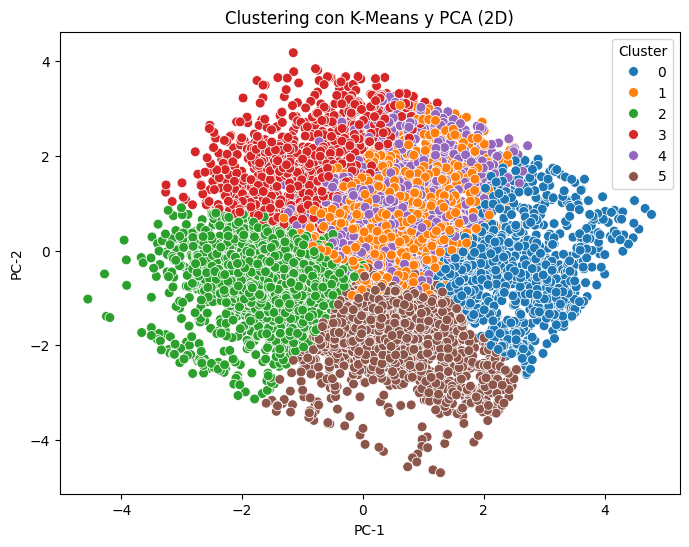

0    1021
1    1725
2    2574
3    1267
4    1770
5    1643
Name: count, dtype: int64

In [500]:
# Aplicar K-Means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Visualizar los resultados usando PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='tab10', s=50)
plt.title('Clustering con K-Means y PCA (2D)')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend(title='Cluster')
plt.show()

# Mostrar la distribución de puntos por cluster
cluster_distribution = pd.Series(labels_kmeans).value_counts().sort_index()
cluster_distribution

*   PC1 separa los datos en función de la velocidad de rotación y el torque.
*   PC2 refleja principalmente diferencias en las temperaturas.
*   PC3 está casi completamente relacionada con el desgaste de la herramienta.

In [491]:
import plotly.graph_objects as go
import seaborn as sns

# Convertir a DataFrame para facilitar la manipulación
df = pd.DataFrame(X_pca, columns=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3'])
df['Cluster'] = labels_kmeans

palette = sns.color_palette("tab10", n_colors=6)
colors = [f'rgb({int(r*255)},{int(g*255)},{int(b*255)})' for r, g, b in palette]

# Crear la figura 3D
fig = go.Figure()

# Agregar puntos para cada cluster
for cluster in range(6):
    cluster_data = df[df['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Componente Principal 1'],
        y=cluster_data['Componente Principal 2'],
        z=cluster_data['Componente Principal 3'],
        mode='markers',
        marker=dict(size=4, color=colors[cluster]),
        name=f'Cluster {cluster}'
    ))

# Configurar diseño
fig.update_layout(
    title='Clustering con K-Means y PCA (3D)',
    scene=dict(
        xaxis_title='Componente Principal 1',
        yaxis_title='Componente Principal 2',
        zaxis_title='Componente Principal 3'
    ),
    legend_title='Cluster'
)

# Mostrar la figura interactiva
fig.show()


*   PC1 separa los datos en función de la velocidad de rotación y el torque.
*   PC2 refleja principalmente diferencias en las temperaturas.
*   PC3 está casi completamente relacionada con el desgaste de la herramienta.